          SALES PERFORMANCE ANALYSIS USING GOOGLE ADS DATA

AIM: Evaluate campaign performance by examining engagement (clicks), conversion efficiency, cost, sales, roi, and device distribution.


DATASET OVERVIEW: This dataset contains raw, uncleaned advertising data from a simulated Google Ads campaign promoting data analytics courses and services. It closely mimics what real digital marketers and analysts would encounter when working with exported campaign data — including typos, formatting issues, missing values, and inconsistencies.


 Columns in the Dataset:
Column Name -----
-Description
Ad_ID --------Unique ID of the ad campaign,

Campaign_Name ------Name of the campaign (with typos and variations),

Clicks --Number of clicks received,

Impressions --Number of ad impressions,

Cost --Total cost of the ad (in ₹ or $ format with missing values),

Leads ---Number of leads generated,

Conversions ----Number of actual conversions (signups, sales, etc.),

Conversion Rate ---Calculated conversion rate (Conversions ÷ Clicks),

Sale_Amount ---Revenue generated from the conversions,

Ad_Date------ Date of the ad activity (in inconsistent formats like YYYY/MM/DD, DD-MM-YY),

Location ------------City where the ad was served (includes spelling/case variations),

Device------------ Device type (Mobile, Desktop, Tablet with mixed casing),

Keyword ----------Keyword that triggered the ad (with typos).

  OBJECTIVES:
  
1,Measure Engagement

Analyze click-through rates (CTR) to assess how effectively campaigns attract user attention.

2,Assess Conversion Efficiency

Evaluate how well clicks are converted into meaningful outcomes (sales, sign-ups, or leads).

3,Examine Cost Effectiveness

Compare campaign costs against generated sales and ROI to identify efficient vs. wasteful spending.

4,Analyze Sales Contribution

Determine the share of total sales driven by each campaign and highlight top performers.

5,Evaluate ROI & ROAS

Calculate return on investment (ROI) and return on ad spend (ROAS) to measure profitability and efficiency.

6,Study Device Distribution

Break down performance by device type (mobile, desktop, tablet) to uncover platform-specific trends.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


pandas library used for data loading , cleaning and manipulation
numpy libraries used for scienrific computing (numbers,array,mathematical operations)
matplotlib used for basic ploting (visualization)
seaborn used for statistical plot with better asthetic (visualization) 

Data Loading and Initial Overview 

In [2]:
df= pd.read_csv("C:\suji\da projects\GoogleAds_DataAnalytics_Sales_Uncleaned.csv")

In [3]:
df.shape

(2600, 13)

In [4]:
df.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,16-11-2024,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,16-11-2024,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,26-11-2024,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,22-11-2024,hyderabad,desktop,online data analytic


In [5]:
df.dtypes

Ad_ID               object
Campaign_Name       object
Clicks             float64
Impressions        float64
Cost                object
Leads              float64
Conversions        float64
Conversion Rate    float64
Sale_Amount         object
Ad_Date             object
Location            object
Device              object
Keyword             object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ad_ID            2600 non-null   object 
 1   Campaign_Name    2600 non-null   object 
 2   Clicks           2488 non-null   float64
 3   Impressions      2546 non-null   float64
 4   Cost             2503 non-null   object 
 5   Leads            2552 non-null   float64
 6   Conversions      2526 non-null   float64
 7   Conversion Rate  1974 non-null   float64
 8   Sale_Amount      2461 non-null   object 
 9   Ad_Date          2600 non-null   object 
 10  Location         2600 non-null   object 
 11  Device           2600 non-null   object 
 12  Keyword          2600 non-null   object 
dtypes: float64(5), object(8)
memory usage: 264.2+ KB


In [7]:
df.describe()

,Clicks,Impressions,Leads,Conversions,Conversion Rate
count,2488.000000,2546.000000,2552.000000,2526.000000,1974.000000
mean,138.956994,4523.280833,20.003918,6.519002,0.048979
std,34.619376,869.927913,6.032317,2.272573,0.019987
min,80.000000,3000.000000,10.000000,3.000000,0.015000
25%,110.000000,3764.000000,15.000000,5.000000,0.035000
50%,139.000000,4518.500000,20.000000,7.000000,0.046000
75%,169.000000,5279.500000,25.000000,9.000000,0.058000
max,199.000000,5999.000000,30.000000,10.000000,0.123000


Data Claning

In [8]:
df.isnull().sum()


Ad_ID                0
Campaign_Name        0
Clicks             112
Impressions         54
Cost                97
Leads               48
Conversions         74
Conversion Rate    626
Sale_Amount        139
Ad_Date              0
Location             0
Device               0
Keyword              0
dtype: int64

In [9]:
df.columns = df.columns.str.strip().str.lower()
#.str.strip()Removes leading and trailing whitespace from each column name.
#.str.lower()Converts all column names to lowercase.

In [10]:
df.dtypes

ad_id               object
campaign_name       object
clicks             float64
impressions        float64
cost                object
leads              float64
conversions        float64
conversion rate    float64
sale_amount         object
ad_date             object
location            object
device              object
keyword             object
dtype: object

In [11]:
df['ad_date'] = pd.to_datetime(df['ad_date'], errors='coerce')
#using pd.to_datetime Converts strings or numbers into objects.
# 'coerce'in pandas libraray missing value automaticaly replaced with NaT(Not a Time) if value is invalid or missing


In [12]:
df['cost'] = df['cost'].str.replace('[^0-9.-]', '', regex=True)
#('[^0-9.-]'  Match any character that is NOT a digit, a dot, or a minus sign Match any character that is NOT a digit, a dot, or a minus sign
df['cost'] = df['cost'].astype(float)

In [13]:
df['sale_amount'] = df['sale_amount'].str.replace('[^0-9.-]', '', regex=True)
df['sale_amount'] = df['sale_amount'].astype(float)

In [14]:
for col in df.columns:
    mode_val = df[col].mode()
    if not mode_val.empty:
        df[col] = df[col].fillna(mode_val[0])
print(df)     
# filling missing values with modevalue 

      ad_id          campaign_name  clicks  impressions    cost  leads  \
0     A1000    DataAnalyticsCourse   104.0       4498.0  231.88   14.0   
1     A1001    DataAnalyticsCourse   173.0       5107.0  216.84   10.0   
2     A1002    Data Anlytics Corse    90.0       4544.0  203.66   26.0   
3     A1003  Data Analytcis Course   142.0       3185.0  237.66   17.0   
4     A1004   Data Analytics Corse   156.0       3361.0  195.90   30.0   
...     ...                    ...     ...          ...     ...    ...   
2595  A3595    DataAnalyticsCourse    88.0       5344.0  242.07   17.0   
2596  A3596    DataAnalyticsCourse   154.0       3211.0  248.28   14.0   
2597  A3597    Data Anlytics Corse   113.0       3808.0  233.25   18.0   
2598  A3598   Data Analytics Corse   196.0       5853.0  220.13   16.0   
2599  A3599   Data Analytics Corse   127.0       5453.0  218.69   12.0   

      conversions  conversion rate  sale_amount    ad_date   location  \
0             7.0            0.058    

In [15]:
df['campaign_name'] = df['campaign_name'].str.lower()
df['device'] = df['device'].str.lower()
df['location'] = df['location'].str.lower()


In [16]:
df.drop_duplicates(inplace=True)


In [17]:
# filtering
# Campaigns with more than 100 clicks
df_filtered = df[df['clicks'] > 100]


In [18]:
# Creating derived columns
# CPC = Cost / Clicks
df['cpc'] = (df['cost'] / df['clicks']).round(2)
df['cpc'] = df['cpc'].replace([np.inf, -np.inf], np.nan)
    

In [19]:
# Revenue per Conversion
df['revenue_per_conversion'] = (df['sale_amount'] / df['conversions']).round(2)
df['revenue_per_conversion'] = df['revenue_per_conversion'].replace([np.inf, -np.inf], np.nan)
# .round(2) means you are rounding numerical values to 2 decimal places.
# np.inf , -np.inf,np.nan means positive ,negative infinity and not a number


In [20]:
# roi(Return on Investment) = (Revenue - Cost) / Cost * 100
df['roi'] = ((df['sale_amount'] - df['cost']) / df['cost'] * 100).round(2)
df['roi'] = df['roi'].replace([np.inf, -np.inf], np.nan)
    

In [21]:
 # profit = Revenue - Cost
 df['profit'] = (df['sale_amount'] - df['cost']).round(2)

In [22]:
# roas(Return on Ad Spend) = Revenue / Cost
df['roas'] = (df['sale_amount'] / df['cost']).round(2)
df['roas'] = df['roas'].replace([np.inf, -np.inf], np.nan)

In [23]:
df.columns
df.columns = df.columns.str.strip().str.lower()
#Normalize case to avoid case-sensitivity issues

In [24]:
df.describe()
# to understand distributon and central tendancy

,clicks,impressions,cost,leads,conversions,conversion rate,sale_amount,ad_date,cpc,revenue_per_conversion,roi,profit,roas
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,138.441923,4525.975000,215.224908,20.077692,6.532692,0.045854,1510.428462,2024-11-15 16:54:38.769230848,1.657558,266.683615,607.746312,1295.203554,7.077431
min,80.000000,3000.000000,180.010000,10.000000,3.000000,0.015000,1000.000000,2024-11-01 00:00:00,0.910000,100.200000,306.550000,757.190000,4.070000
25%,111.000000,3778.000000,198.385000,15.000000,5.000000,0.036000,1262.000000,2024-11-08 00:00:00,1.290000,176.475000,488.525000,1050.890000,5.887500
50%,136.500000,4549.500000,217.405000,20.000000,7.000000,0.039000,1527.000000,2024-11-16 00:00:00,1.560000,229.155000,603.715000,1312.260000,7.040000
75%,167.000000,5268.250000,232.297500,25.000000,8.000000,0.054000,1728.000000,2024-11-23 00:00:00,1.940000,330.042500,716.942500,1523.930000,8.170000
max,199.000000,5999.000000,249.890000,30.000000,10.000000,0.123000,2000.000000,2024-11-30 00:00:00,3.090000,662.670000,1005.260000,1814.500000,11.050000
std,33.952161,861.041961,19.919061,6.000523,2.241415,0.018278,283.689335,NaN,0.462109,122.327359,148.594778,284.090195,1.485975


In [25]:
df.to_csv("GoogleAds_DataAnalytics_Sales_cleaned.csv", index=False)

Exploratory Data Analysis (EDA) And Visualizations

In [26]:
# Pivot table summarizing clicks and conversions by campaign and device
pivot_table = pd.pivot_table(
    df,
    values=['clicks', 'conversions', 'cost', 'sale_amount', 'roi'],
    index=['campaign_name'],
    columns=['device'],
    aggfunc='sum',
    fill_value=0
)

print(pivot_table)


                        clicks                   conversions                  \
device                 desktop   mobile   tablet     desktop  mobile  tablet   
campaign_name                                                                  
data analytcis course  31334.0  33283.0  28300.0      1515.0  1619.0  1346.0   
data analytics corse   29555.0  31887.0  29869.0      1441.0  1473.0  1334.0   
data anlytics corse    32061.0  26513.0  29030.0      1451.0  1286.0  1355.0   
dataanalyticscourse    28481.0  30977.0  28659.0      1421.0  1421.0  1323.0   

                           cost                            roi             \
device                  desktop    mobile    tablet    desktop     mobile   
campaign_name                                                               
data analytcis course  48766.87  52935.51  44728.47  143421.00  147984.70   
data analytics corse   47140.00  47673.07  44881.36  130701.28  135981.21   
data anlytics corse    49374.05  41577.19  45777.84  1

Univariate Analysis

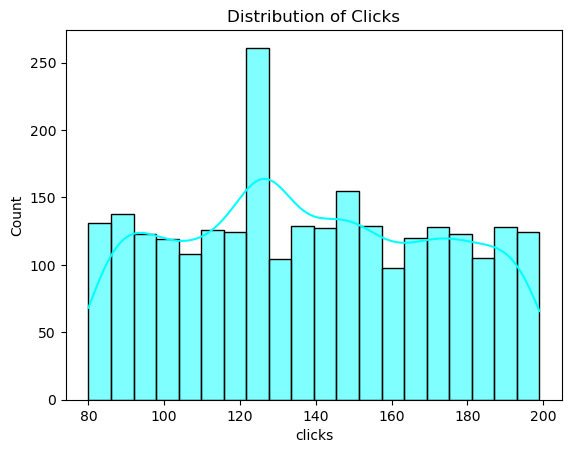

In [27]:
# Distibution of click
sns.histplot(df['clicks'], bins=20, color='cyan', edgecolor='black', kde=True)
plt.title("Distribution of Clicks")
plt.show()


insight:The distribution of clicks reveals the overall engagement pattern across campaigns. The central clustering shows the typical level of user interaction, while the spread and presence of outliers highlight variability in campaign reach. Campaigns generating consistently higher clicks indicate strong audience appeal, whereas those with fewer clicks may suffer from weaker targeting or creative effectiveness. This variability underscores the need to replicate strategies from high‑engagement campaigns and optimize underperforming ones.

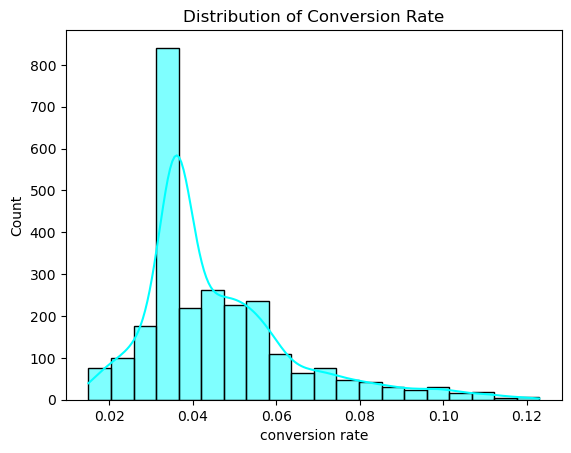

In [28]:
# Convertion rate
sns.histplot(df['conversion rate'], bins=20,color='cyan', edgecolor='black', kde=True)
plt.title("Distribution of Conversion Rate")
plt.show()


insight:The distribution of conversion rates reveals the overall efficiency of campaigns. The central clustering around the median shows the typical performance level, while the spread and tails highlight variability across campaigns. A narrow distribution would indicate consistent conversion efficiency, but wider dispersion suggests that some campaigns are outperforming while others lag behind. This variability points to opportunities for optimizing underperforming campaigns and replicating strategies from high‑conversion ones.

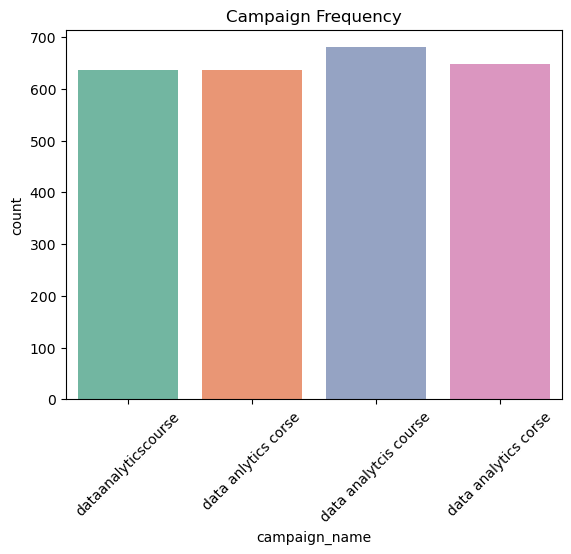

In [29]:
# campaign performance
sns.countplot(x='campaign_name',palette='Set2', data=df)
plt.title("Campaign Frequency")
plt.xticks(rotation=45)
plt.show()


insight:The campaign frequency analysis shows which campaigns were run most often, highlighting the organization’s focus areas. High‑frequency campaigns indicate priority initiatives or larger budget allocations, while low‑frequency campaigns may reflect niche targeting or underutilization. This distribution provides a clear view of where resources have been concentrated and where opportunities may exist to diversify efforts.

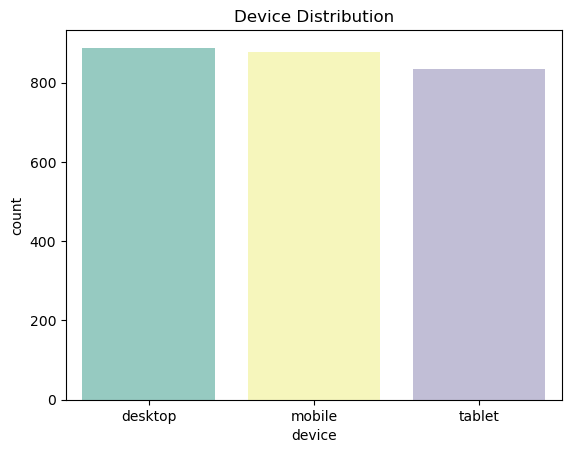

In [30]:
# Device Usage
sns.countplot(x='device',palette='Set3', data=df)
plt.title("Device Distribution")
plt.show()


insight:The device distribution analysis shows which platforms dominate user engagement. A clear skew toward certain devices indicates where most interactions occur, guiding optimization efforts. Campaigns should prioritize the dominant device segment to maximize reach and efficienc.y, while underrepresented devices may need tailored strategies to improve performance.

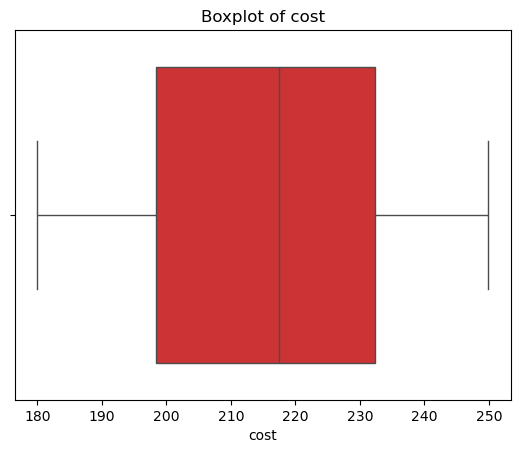

In [31]:
# box plot of cost
sns.boxplot(x='cost',palette='Set1', data=df)
plt.title(f"Boxplot of cost")
plt.show()


insight:“The cost distribution highlights variability in campaign spending. While the median cost reflects typical investment levels, the presence of outliers indicates certain campaigns or dates with unusually high spending. This spread suggests that while most costs remain moderate, occasional spikes may impact overall efficiency, pointing to the need for tighter budget control and monitoring of high‑spend campaigns.

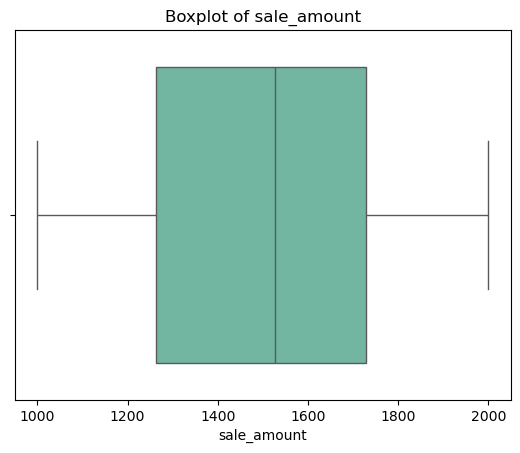

In [32]:
# boxplot of sale_amount 
sns.boxplot(x='sale_amount',palette='Set2', data=df)
plt.title(f"Boxplot of sale_amount")
plt.show()


Insight:The distribution of sale amounts shows clear variability across transactions. While the median sale amount reflects the typical revenue per transaction, the presence of outliers indicates occasional high‑value sales that significantly boost overall performance. The spread also highlights inconsistencies, suggesting that while some sales are consistently moderate, others fluctuate widely, pointing to opportunities for stabilizing and scaling high‑value outcomes.

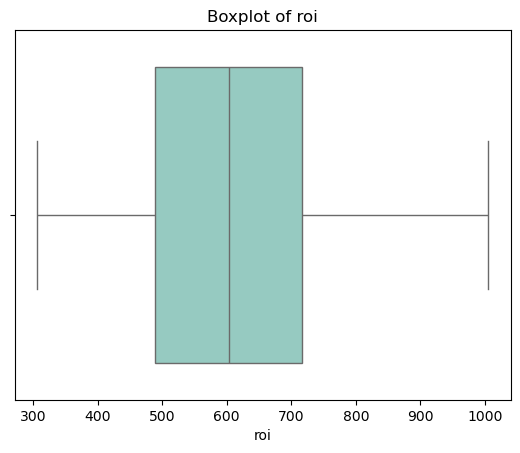

In [33]:
# box plot of roi
sns.boxplot(x='roi',palette='Set3', data=df)
plt.title(f"Boxplot of roi")
plt.show()


insight:The ROI distribution reveals the overall spread and variability of campaign efficiency. While the median ROI indicates the central tendency of performance, the presence of outliers and wide ranges highlights inconsistent returns across campaigns. This suggests that while some campaigns deliver strong efficiency, others underperform and require optimization to reduce volatility and improve consistency.

Bivariate Analysis

([<matplotlib.patches.Wedge at 0x23d55316660>,
 [Text(-0.15519963653076058, -1.0889963603340096, 'Clicks'),
  Text(0.1551987624167267, 1.088996484909073, 'Conversions')],
 [Text(-0.08465434719859667, -0.5939980147276416, '95.5%'),
  Text(0.08465387040912364, 0.5939980826776761, '4.5%')])

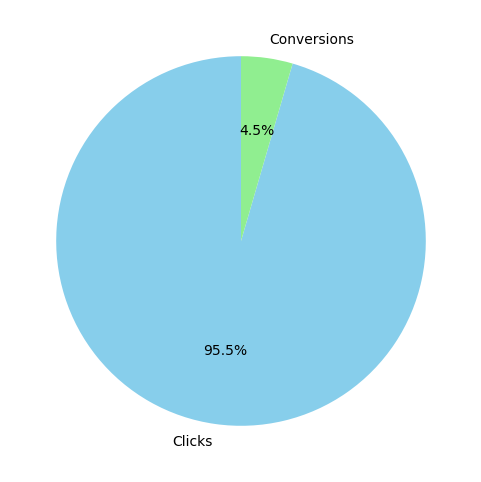

In [34]:
#click vs conversion
total_clicks = df["clicks"].sum()
total_conversions = df["conversions"].sum()
values = [total_clicks, total_conversions]
labels = ["Clicks", "Conversions"]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=90, colors=["skyblue","lightgreen"])


Insight:The analysis shows that while clicks represent the majority share, only a smaller proportion converts into actual outcomes. This highlights a clear efficiency gap between engagement and conversion, indicating that improving targeting, ad quality, or user experience is essential to turn more clicks into meaningful conversions.

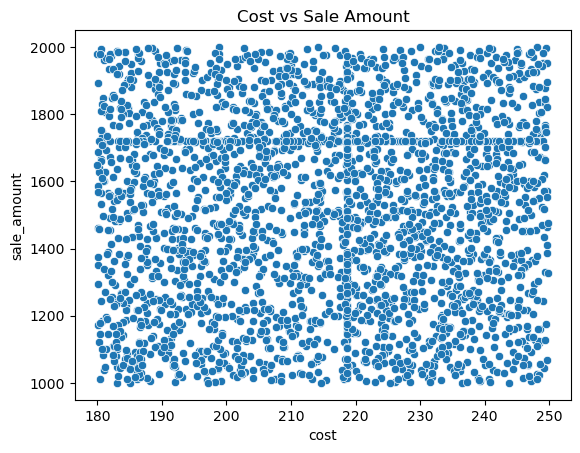

In [35]:
# cost vs sale amount
sns.scatterplot(x='cost', y='sale_amount', data=df)
plt.title("Cost vs Sale Amount")
plt.show()


insight:The Cost vs Sale Amount analysis indicates a positive relationship: higher advertising costs generally lead to higher sales, though the strength of this relationship may vary across campaigns. This suggests that while increased spend can drive revenue, efficiency should be monitored to ensure that rising costs translate into proportionate sales growth.

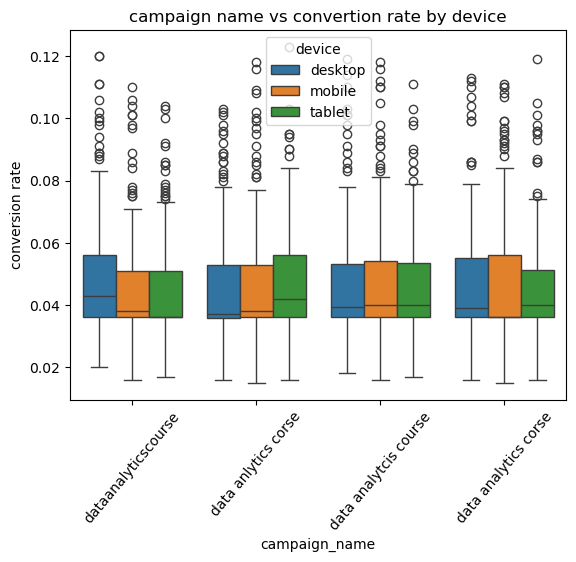

In [36]:
#campaign vs convertion rate by device
sns.boxplot(data=df, x='campaign_name', y='conversion rate', hue='device')
plt.title("campaign name vs convertion rate by device")
plt.xticks(rotation=50)
plt.show()

insight:The conversion rate distribution reveals that device type plays a significant role in campaign performance. Certain campaigns show consistently higher conversion rates on specific devices, indicating stronger audience engagement and better optimization for those platforms. Conversely, campaigns with lower or more variable conversion rates across devices highlight opportunities to improve targeting, creative design, or user experience.

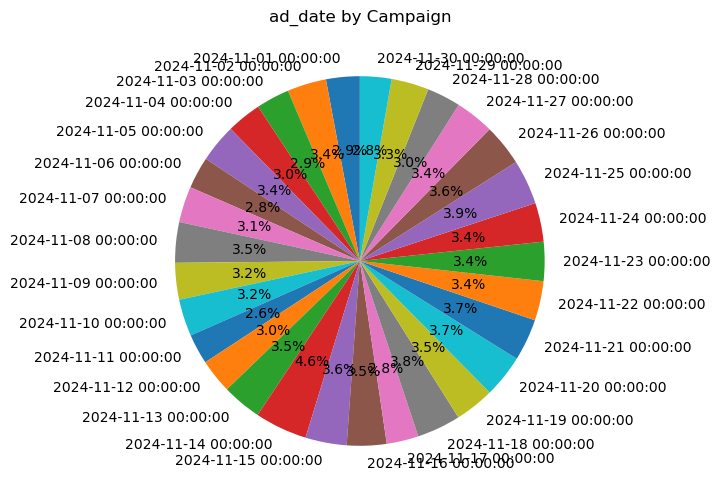

In [37]:
# Conversion share by campaign
conversion_by_campaign = df.groupby("ad_date")["conversions"].sum()

plt.figure(figsize=(6,6))
plt.pie(conversion_by_campaign, labels=conversion_by_campaign.index, autopct="%1.1f%%", startangle=90)
plt.title("ad_date by Campaign")
plt.show()


insight:The conversion distribution across dates shows that a few specific days account for the majority of conversions, highlighting peak performance periods. These high‑conversion dates represent optimal campaign timing, while dates with smaller shares may require strategy adjustments to improve engagement and conversion efficiency.

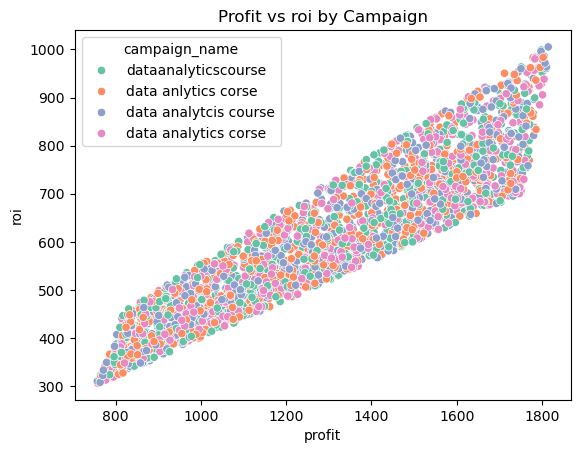

In [38]:
# scatterplot for profit vs campaign
sns.scatterplot(x="profit", y="roi", hue="campaign_name", data=df, palette="Set2")
plt.title("Profit vs roi by Campaign")
plt.show()


insight:campaigns vary in efficiency: some achieve high profit alongside strong ROI, making them both profitable and cost‑effective, while others generate profit at lower ROI, indicating inefficiencies in ad spend. Campaigns with low profit and ROI are clear underperformers and require strategic review or optimization.

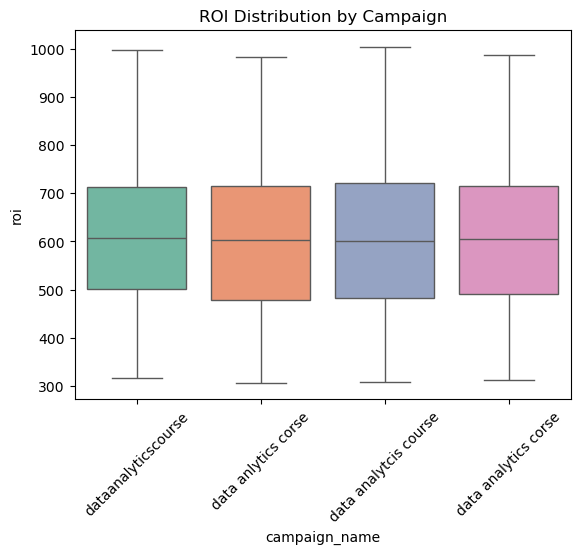

In [39]:
# box plot for campaign 
sns.boxplot(x="campaign_name", y="roi", data=df, palette="Set2")
plt.title("ROI Distribution by Campaign")
plt.xticks(rotation=45)
plt.show()


insight:The ROI distribution analysis highlights clear differences in campaign efficiency. Some campaigns show consistently higher and more stable ROI, indicating strong performance, while others display wider variability or lower median ROI, suggesting inconsistent returns and potential inefficiencies. Focusing investment on high‑ROI campaigns and optimizing weaker ones can improve overall profitability.

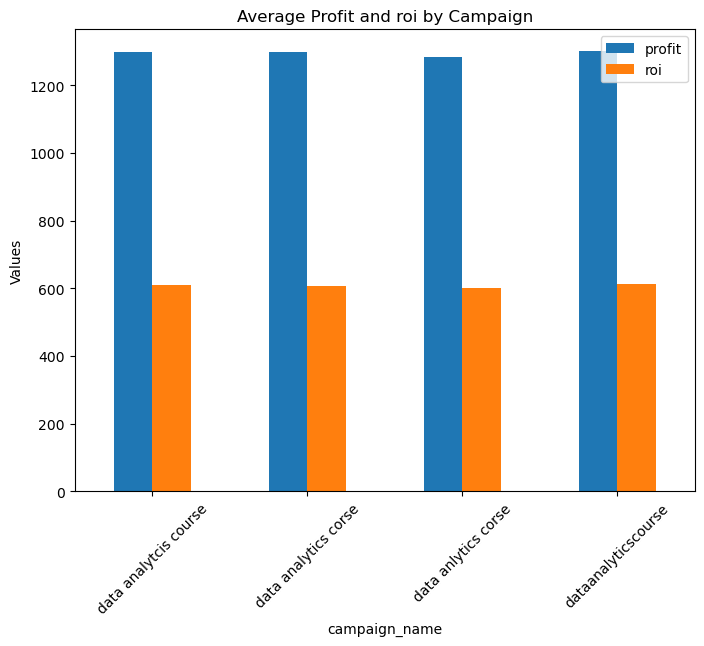

In [40]:
# Profit vs ROI comparison
df_grouped = df.groupby("campaign_name")[["profit","roi"]].mean().reset_index()

df_grouped.plot(x="campaign_name", y=["profit","roi"], kind="bar", figsize=(8,6))
plt.title("Average Profit and roi by Campaign")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

insight:The comparison highlights that certain campaigns consistently deliver both higher profit and stronger roi, making them the most effective drivers of performance. Campaigns with lower roi despite reasonable profit indicate inefficiencies in ad spend, while those with low profit and roi require strategic review or reallocation of resources.

MULTIVARIATE ANALYSIS

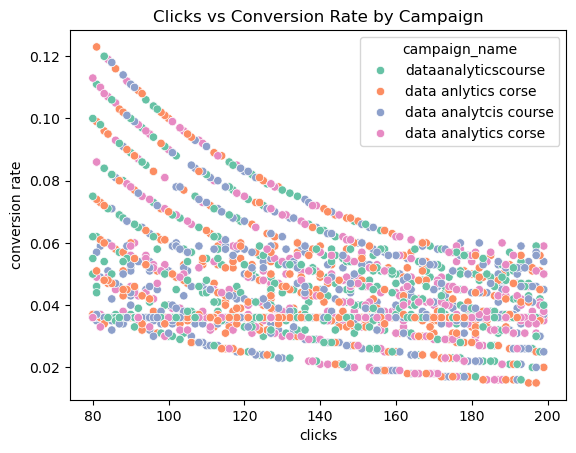

In [41]:
# click vs conversion 
sns.scatterplot(x="clicks", y="conversion rate", hue="campaign_name", data=df, palette="Set2")
plt.title("Clicks vs Conversion Rate by Campaign")
plt.show()



insight:Some campaigns achieve higher conversion rates even with fewer clicks, indicating stronger targeting and efficiency, while others require more clicks to generate conversions, suggesting weaker audience alignment or creative performance. Identifying and scaling the high‑efficiency campaigns can maximize overall ROI

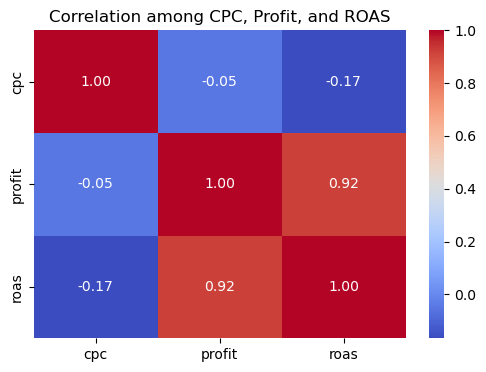

In [42]:
#correlartion amoung cpc,profit,roas
plt.figure(figsize=(6,4))
sns.heatmap(df[["cpc","profit","roas"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation among CPC, Profit, and ROAS")
plt.show()


insight:
The correlation analysis reveals how ad efficiency impacts profitability: higher CPC tends to negatively influence ROAS, while stronger ROAS is positively associated with profit. This indicates that campaigns with lower CPC generally deliver better returns, and maximizing ROAS is a key driver of profit growth.

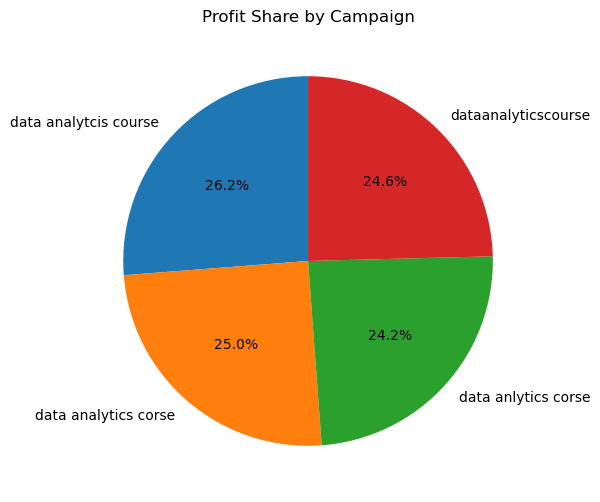

In [43]:
# profit share for campaign
profit_by_campaign = df.groupby("campaign_name")["profit"].sum()

plt.figure(figsize=(6,6))
plt.pie(profit_by_campaign, labels=profit_by_campaign.index, autopct="%1.1f%%", startangle=90)
plt.title("Profit Share by Campaign")
plt.show()


insight:
The profit distribution reveals that a few campaigns contribute the majority of overall profit, highlighting key drivers of business performance. Campaigns with smaller profit shares may require optimization or reallocation of resources to improve efficiency and maximize returns.”

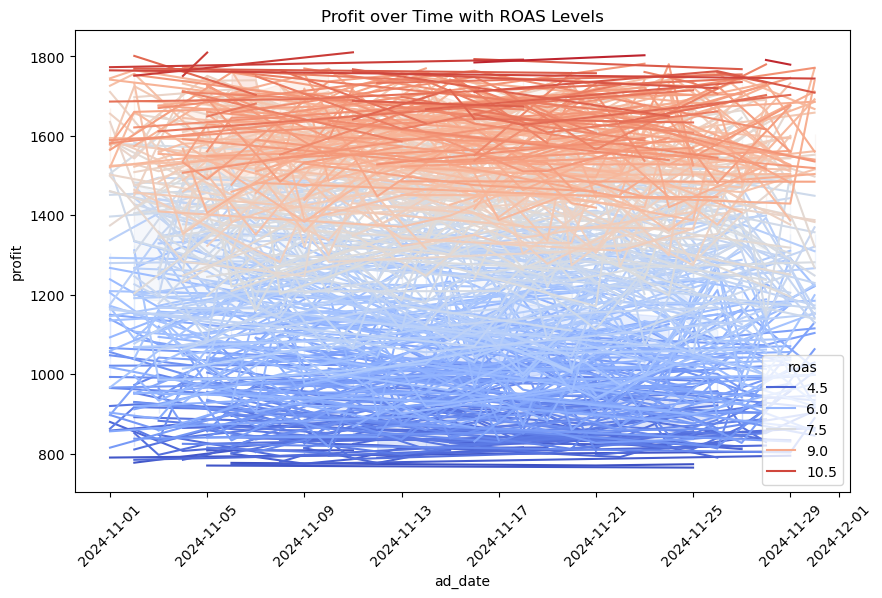

In [44]:
# profit over time with roas level
plt.figure(figsize=(10,6))
sns.lineplot(x="ad_date", y="profit", hue="roas", data=df, palette="coolwarm")
plt.title("Profit over Time with ROAS Levels")
plt.xticks(rotation=45)
plt.show()


Insight:
The analysis shows that the most valuable campaign dates are those delivering both high profit and strong ROAS, while days with high profit but weak ROAS highlight inefficiencies in ad spend

REPORT:

The analysis of Google Ads campaigns reveals a clear performance landscape shaped by engagement, conversion efficiency, cost management, sales contribution, ROI, and device distribution.

Engagement (Clicks): Campaigns vary widely in attracting user attention. High-click campaigns demonstrate strong reach but do not always translate into conversions.

Conversion Efficiency: Several campaigns show inefficiencies in turning clicks into meaningful outcomes, highlighting gaps in landing page design, targeting, or funnel optimization.

Cost Effectiveness: While some campaigns deliver strong ROI relative to spend, others incur high costs with limited returns, underscoring the need for tighter budget control.

Sales Contribution: A small set of campaigns drive the majority of sales, while others contribute marginally, suggesting opportunities to reallocate resources.

ROI & ROAS: High-performing campaigns consistently deliver both profitability and efficiency, whereas low-ROI campaigns drain resources without meaningful returns.

Device Distribution: Performance differs across devices, with mobile campaigns showing higher engagement but weaker conversion efficiency compared to desktop. Timing also plays a critical role, with peak periods yielding stronger ROI.


RECOMMENDATION

1.Increase investment in campaigns that consistently deliver high profit and strong ROI

2.Optimize ad creatives and targeting to ensure clicks translate into meaningful outcomes.

3.Phase out campaigns with low profit and low ROI.(These underperformers drain resources without meaningful returns, and reallocating spend will improve overall efficiency.)

4.Schedule ads during peak performance windows to maximize ROI.

5.Segment campaigns by device type and tailor creatives accordingly.